In [52]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

# **지수분포**

In [60]:
class Expo:
    
    def __init__(self,lamb):
        
        self.lamb = lamb
        
    def possion(self):
        '''
        포아송 분포를 따르는 1 단위 시간 내 
        0 번 성공 할 확률 
        '''
        k = 0 
        return (np.exp(-self.lamb) * self.lamb ** k)/math.factorial(k)
    
    def cdf(self,t):
        '''
        단위 시간 내 처음 성공할 때 까지의 기간
        
        전체 확률 - t 번 이하까지 모두 실패 할 확률 = t 번 이상 성공 할 확률 
        
        t 단위 기간 동안 성공하지 않아야 하기 때문에 
        
        포아송분포의 pmf ** t 
        '''
        
        return 1 - self.possion() **t
    
    def pmf(self,t):
        '''
        Exponential distribution의 CDF 를 t 에 대해 미분하여 구한
        확률밀도함수
        '''
        
        return self.lamb * np.exp(-self.lamb * t)
    
    def sf(self,t):
        '''
        survival fucntion 으로 CDF 가 P(X <= x) 를 계산했다면
        
        sf 는 P(X >= x) 를 계산하기 위해 1 - P(X <= x) 
        
        '''
        return 1 - self.cdf(t) 
        
    
    def memmoryless(self,s,t):
        '''
        단위기간 s 동안 시간이 지난 후  
        t 안에 사건이 일어날 확률
        
        지수분포는 무기억성을 가지고 있기 때문에 
        지나가버린 s 기간 동안에 대한 정보는 도움을 주지 않음 
        
        P(X >= s + t  , X >= s| X >= s) 인데 X>= s+t 와 X >= s 의 교집합은 X >= s+t 
        
        식은 
        
        P(X >= s+t) / P(X >= s) 가 됨
        '''
        
        S = self.sf(s)
        ST = self.sf(s + t)
        
        print('P(X >= s + t) :' , ST)
        print('P(X >= s) :', S)
        print('\n')
        
        T = self.sf(t)
        
        print('P(X >= s + t)|P(X >= s) : ', round(ST / S,8))
        print('P(X >= t) : ', round(T , 8))

In [61]:
expo = Expo(lamb = 0.2)

In [62]:
expo.possion()

0.8187307530779818

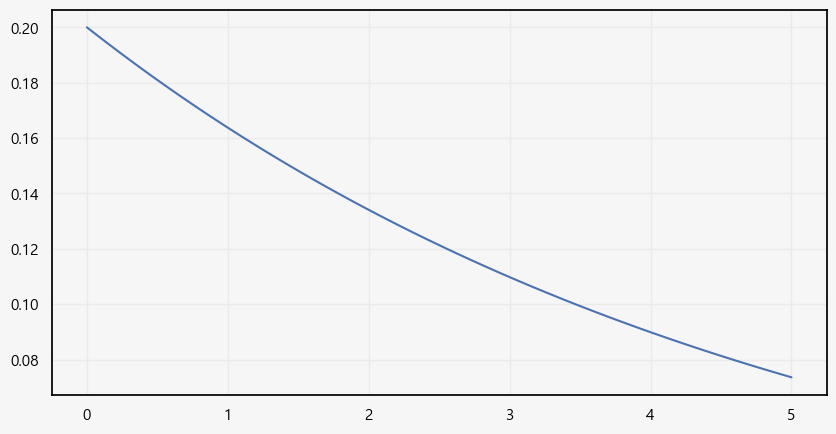

In [63]:
X = np.linspace(0,5,100)
plt.figure(figsize = (10,5))
plt.plot(X,expo.pmf(X))

In [64]:
stats.expon(scale = 1/0.2).cdf(5)

0.6321205588285577

In [65]:
expo.cdf(5)

0.6321205588285578

In [66]:
expo.memmoryless(s = 3 , t = 5)

P(X >= s + t) : 0.20189651799465536
P(X >= s) : 0.5488116360940264


P(X >= s + t)|P(X >= s) :  0.36787944
P(X >= t) :  0.36787944
